Code modified from: https://github.com/pymc-devs/pymc-resources/blob/main/Rethinking_2/Chp_02.ipynb

In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import scipy.stats as stats

%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# 2.4

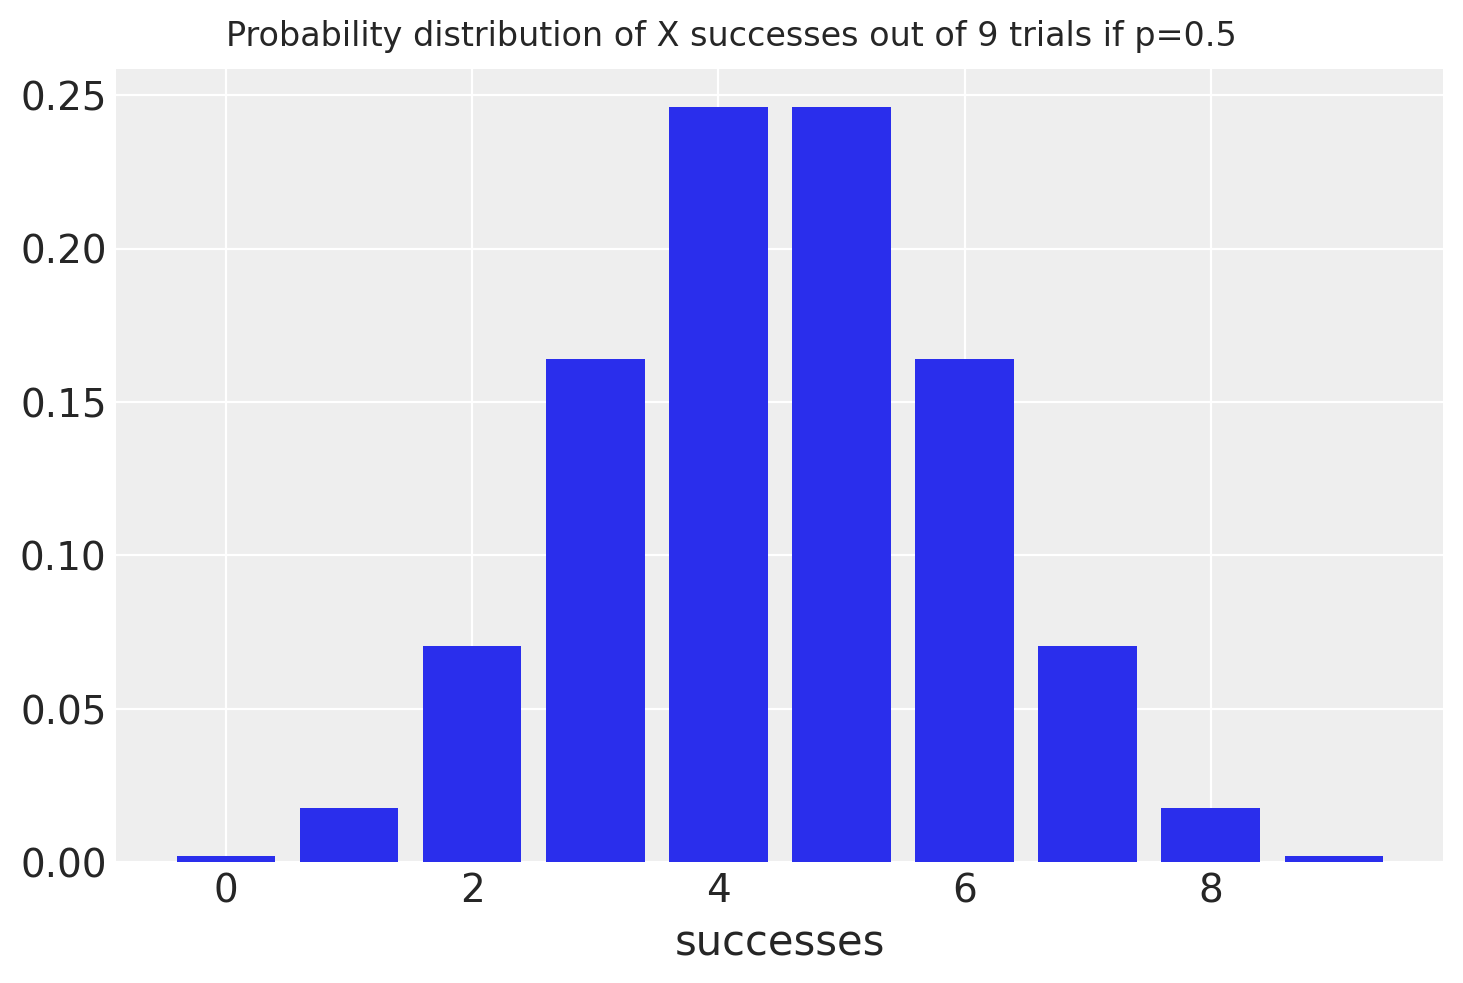

In [26]:
trials = 9

# probability distribution of observing X successes out of 9 trials if p=0.5
# this is not what we are interested in, but we will use the value from the bar associated
# with 6 success4es and compare that value (the relative likelihood to other values) of p
x = np.linspace(0, 9, 10)
y = stats.binom.pmf(x, n=trials, p=0.5)
plt.bar(x, y)
plt.suptitle("Probability distribution of X successes out of 9 trials if p=0.5")
plt.xlabel("successes")
plt.show()

The probability of observing six W’s in nine tosses — below a value of `p = 0.5`.

In [4]:
# pmf is 'probability mass function'
# probability of observing 6 successes out of 9 trials if p=0.5
successes = 6
stats.binom.pmf(successes, n=trials, p=0.5)

0.16406250000000003

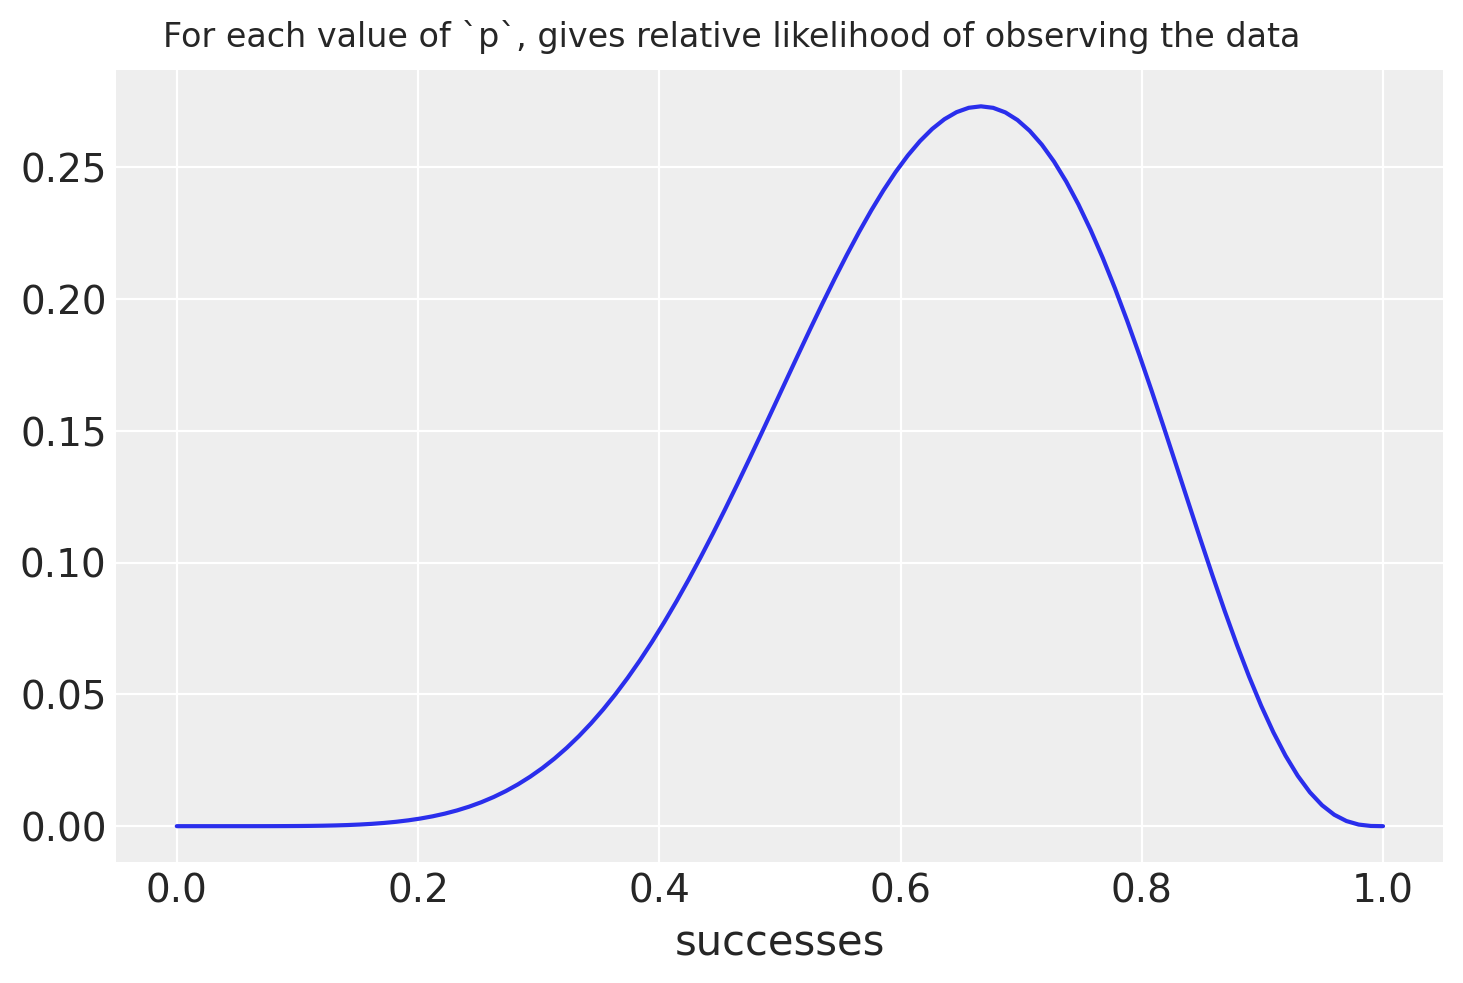

In [31]:
p = np.linspace(0, 1, 100)
y = stats.binom.pmf(successes, n=trials, p=p)
plt.plot(p, y)
plt.suptitle("For each value of `p`, gives relative likelihood of observing the data")
plt.xlabel("successes")
plt.show()

However, y does not sum to `1`, so it is not a probability distribution.

In [32]:
sum(y)

9.900000720901385

In [33]:
y = y / sum(y)
sum(y)

1.0

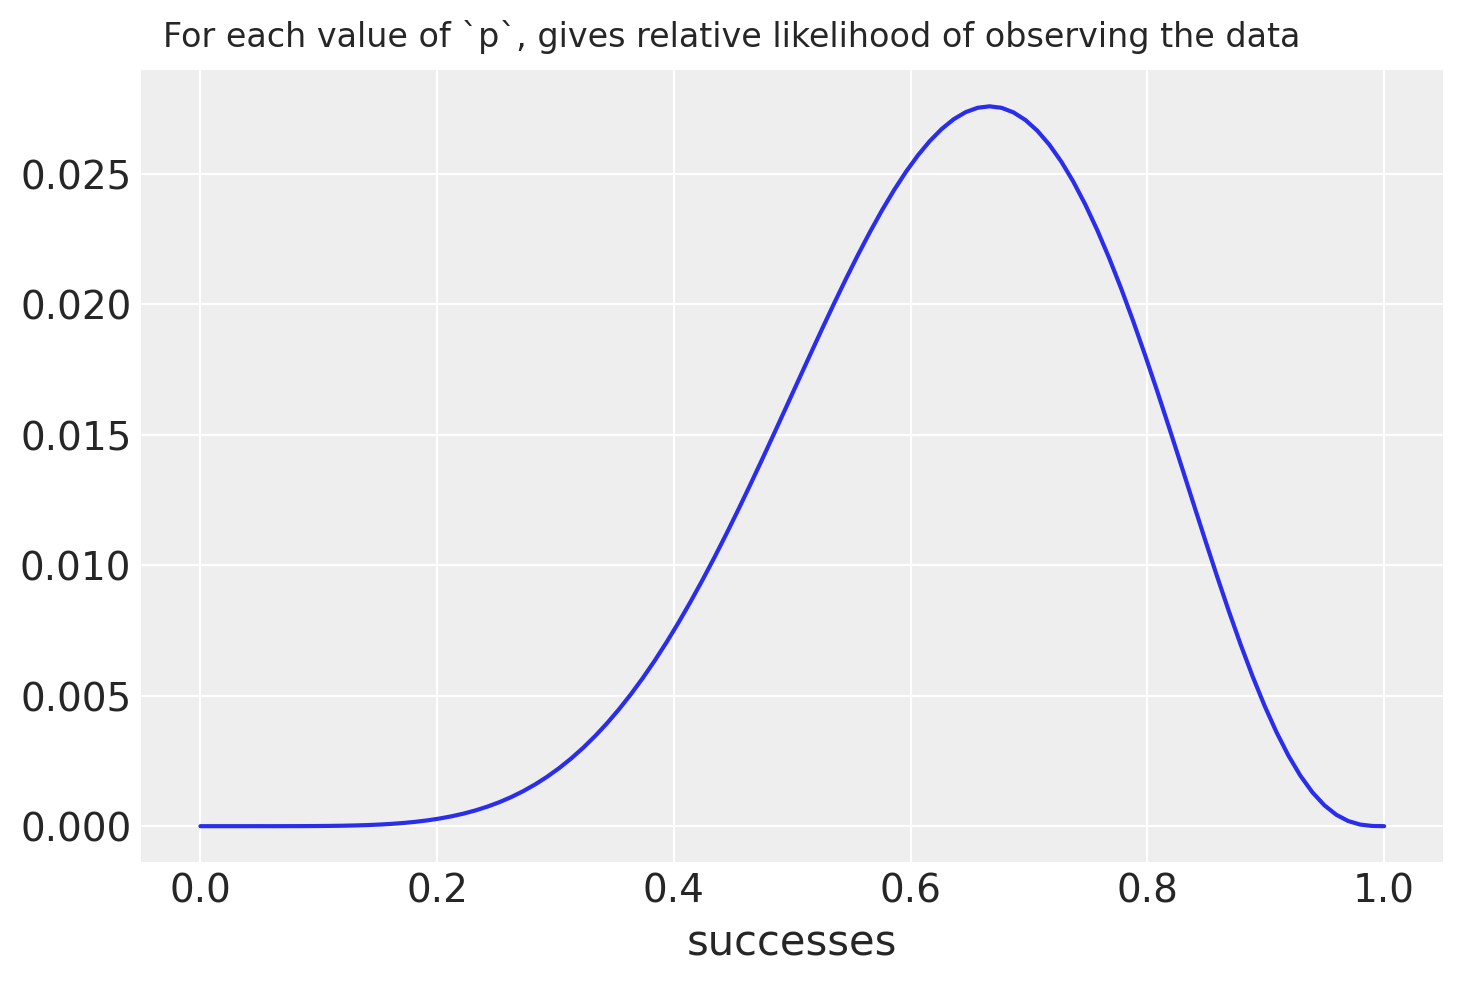

In [34]:
plt.plot(p, y)
plt.suptitle("For each value of `p`, gives relative likelihood of observing the data")
plt.xlabel("successes")
plt.show()

In [37]:
sum(stats.beta.pdf(x=x, a=successes + 1, b=trials - successes + 1))

99.00000720901384

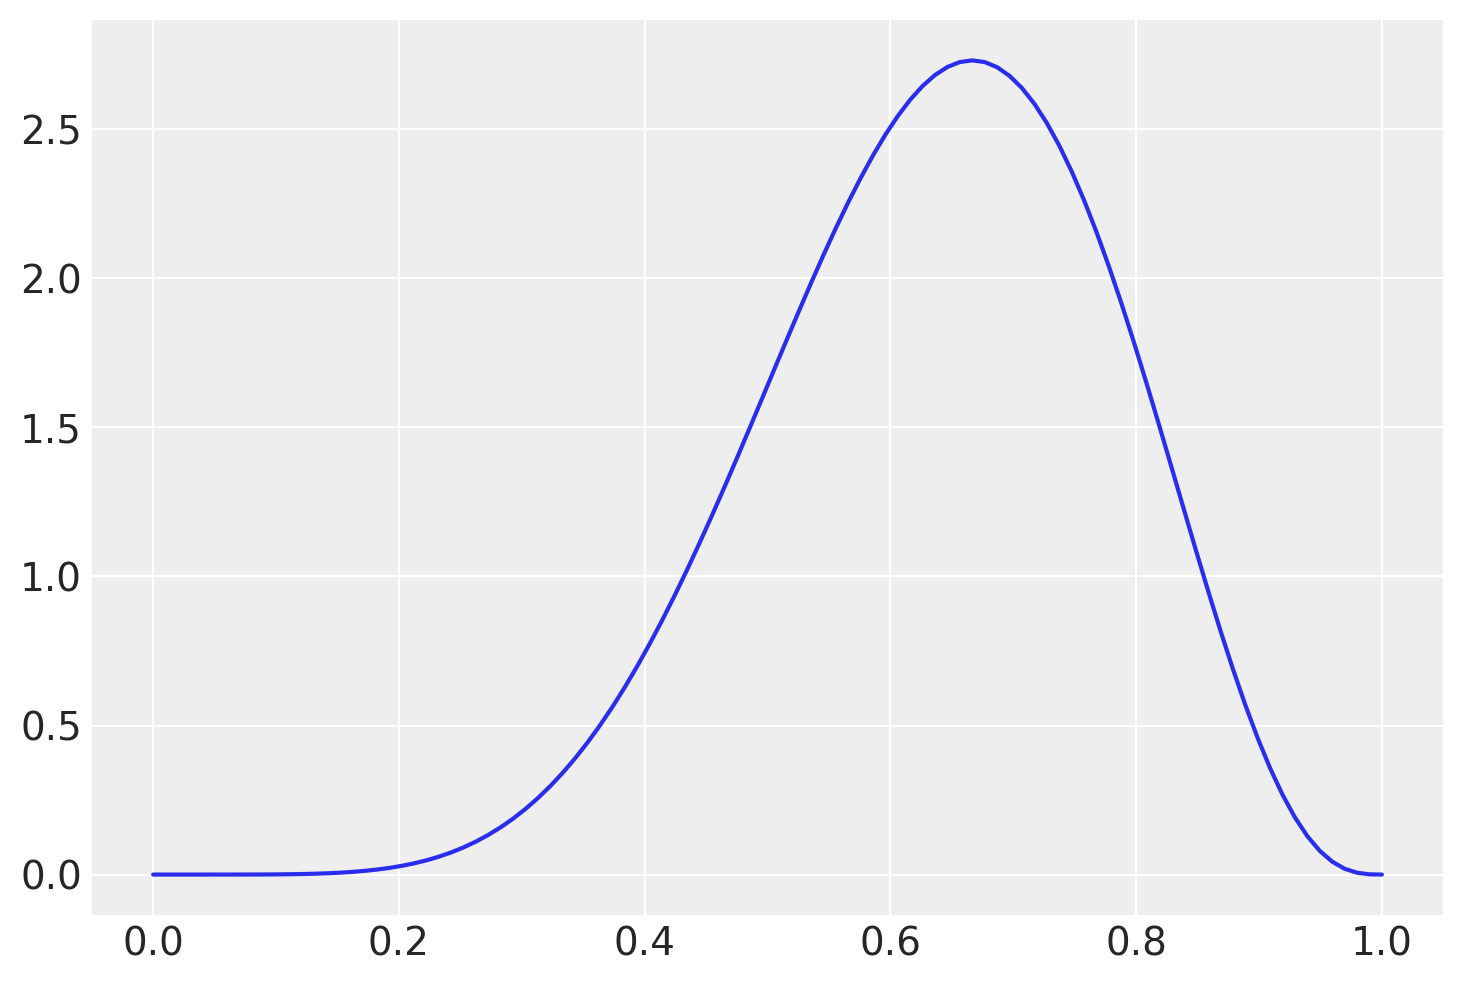

In [36]:
x = np.linspace(0, 1, 100)
# NOTE: `+1` needed to match graph above
y = stats.beta.pdf(x=x, a=successes + 1, b=trials - successes + 1)
plt.plot(x, y)
plt.show()


---

## PYMC

https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html

In [45]:
import pymc as pm
print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.0.1


In [44]:
data = np.repeat((0, 1), (3, 6))
data

array([0, 0, 0, 1, 1, 1, 1, 1, 1])

In [41]:
with pm.Model() as normal_approximation:
    p = pm.Uniform("p", 0, 1)  # uniform priors
    w = pm.Binomial("w", n=len(data), p=p, observed=data.sum())  # binomial likelihood
    mean_q = pm.find_MAP()

    p_value = normal_approximation.rvs_to_values[p]
    p_value.tag.transform = None
    p_value.name = p.name

    std_q = ((1 / pm.find_hessian(mean_q, vars=[p])) ** 0.5)[0]

# display summary of quadratic approximation
print("Mean, Standard deviation\np {:.2}, {:.2}".format(mean_q["p"], std_q[0]))


Mean, Standard deviation
p 0.67, 0.64


In [43]:
trace = pm.sample()

p ~ U(0, 1)